In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#change plt parameter globally 
plt.rcParams.update({'font.size': 18,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16})

In [2]:
train_image_csv = pd.read_csv("data/train_image_level.csv")

train_study_csv = pd.read_csv("data/train_study_level.csv")

#image_label = train_image_csv["label"]

# Images with or without Bounding Boxes

In [3]:
bounding_box_images = np.array(train_image_csv["boxes"].notna())
total_images = len(bounding_box_images)
nr_bounding_box_images = np.sum(bounding_box_images)

In [4]:
if not os.path.isdir("images"):
    os.makedirs("images")

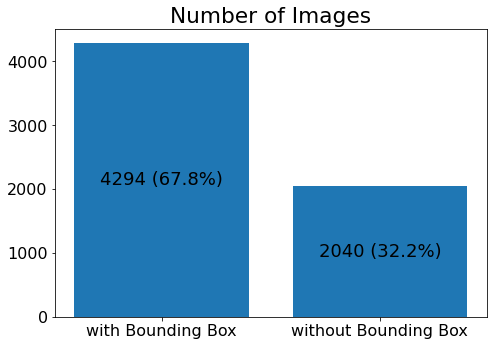

In [71]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['with Bounding Box', 'without Bounding Box']
numbers = [nr_bounding_box_images, total_images - nr_bounding_box_images]
ax.bar(labels, numbers)
plt.title("Number of Images")
for index, number in enumerate(numbers):
    plt.text(x=index,y=number/2,s="{} ({:.1f}%)".format(number, 100*number/total_images), horizontalalignment="center", verticalalignment="center")
plt.savefig("images/bounding_box_barchart.pdf")
plt.show()

In [72]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return """{p:.1f}%
({v:d})""".format(p=pct,v=val)
    return my_autopct

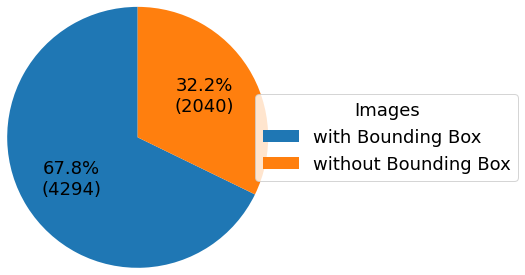

In [76]:
wedges, texts, autotexts = plt.pie(numbers, startangle=90, autopct=make_autopct(numbers), radius = 1.5)
plt.legend(wedges, labels, title="Images", loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.savefig("images/bounding_box_piechart.pdf")
plt.show()

# Studies Label

In [52]:
total_studies = len(train_study_csv)
nr_negativ_pneumonia = np.sum(train_study_csv["Negative for Pneumonia"])
nr_typical_pneumonia = np.sum(train_study_csv["Typical Appearance"])
nr_indeterminate_pneumonia = np.sum(train_study_csv["Indeterminate Appearance"])
nr_atypical_pneumonia = np.sum(train_study_csv["Atypical Appearance"])
pneumonia_numbers = np.array([nr_negativ_pneumonia, nr_typical_pneumonia, nr_indeterminate_pneumonia,
                              nr_atypical_pneumonia])
pneumonia_labels = ["No Pneumonia", "Typical Pneumonia", "Intdeterminate Pneumonia", "Atypical Pneumonia"]
assert total_studies == np.sum(pneumonia_numbers)

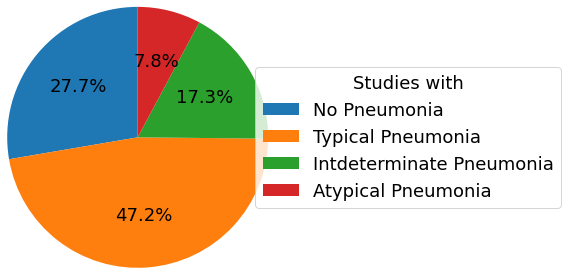

In [78]:
"""plt.pie(pneumonia_numbers, labels = pneumonia_labels, startangle=90)
plt.savefig("images/bounding_box_piechart.pdf")
plt.show()"""
p_wedges, _, _ = plt.pie(pneumonia_numbers, autopct="%.1f%%", startangle=90,radius = 1.5)
plt.legend(p_wedges, pneumonia_labels, title="Studies with", loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.savefig("images/bounding_box_piechart.pdf")
plt.show()